## Handling imbalanced data in customer churn prediction
Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model. We will then handle imbalance in data using various techniques and improve f1-score

In [154]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as  np
%matplotlib inline

In [155]:
url = "https://raw.githubusercontent.com/YuNakamura2020/Data/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [156]:
df.shape

(7043, 21)

## Drop customerID column as it is of no use

In [157]:
df.drop('customerID',axis=1,inplace=True)

In [158]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [159]:
# TotalCharges should be float but it is an object...
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [160]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [161]:
# Some values seems to be not numbers but blank string.
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [162]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [163]:
df.shape

(7043, 20)

In [164]:
df.iloc[488].TotalCharges

' '

In [165]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [166]:
# Remove rows with spaces in TotalCharge
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [167]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [168]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

c:\Projects\Python\Python_practice\.venv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [169]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [170]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

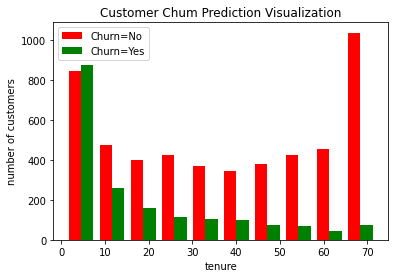

In [171]:
tenure_churn_no = df1[df1.Churn=="No"].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('number of customers')
plt.title('Customer Chum Prediction Visualization')

plt.hist([tenure_churn_no, tenure_churn_yes], color=['red','green'], label=['Churn=No', 
'Churn=Yes'])
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

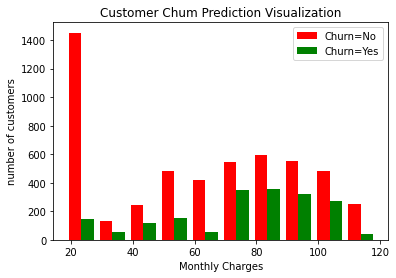

In [172]:
mc_churn_no = df1[df1.Churn=="No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('number of customers')
plt.title('Customer Chum Prediction Visualization')

plt.hist([mc_churn_no, mc_churn_yes], color=['red','green'], label=['Churn=No', 
'Churn=Yes'])
plt.legend()
plt.show

In [173]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}:{df[column].unique()}')

#### Some of the columns have no internet service or no phone service, which can be replaced with a simple No
#### Categorical values has to conver to the number for machine learning 

In [174]:
df1.replace('No internet service', 'No', inplace=True)

c:\Projects\Python\Python_practice\.venv\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [175]:
df1.replace('No phone service', 'No', inplace=True)

In [176]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


#### Convert Yes and No to 1 or 0

In [177]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [178]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

c:\Projects\Python\Python_practice\.venv\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [179]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [180]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [181]:
df1.gender.unique()

array([1, 0], dtype=int64)

#### One hot encording for categorical columns

In [182]:
df2 = pd.get_dummies(data = df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [183]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [184]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2000,1,1,0,0,9,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
4565,1,0,1,0,71,0,0,1,1,1,...,1,0,0,0,1,0,1,0,0,0
1875,0,0,1,0,72,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
3893,1,1,0,0,7,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4469,0,0,0,0,50,1,0,1,1,1,...,0,1,0,0,1,0,0,1,0,0


In [185]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [186]:
cols_to_scale=['tenure', 'TotalCharges', 'MonthlyCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [187]:
df2[cols_to_scale]

,tenure,TotalCharges,MonthlyCharges
0,0.000000,0.001275,0.115423
1,0.464789,0.215867,0.385075
2,0.014085,0.010310,0.354229
3,0.619718,0.210241,0.239303
4,0.014085,0.015330,0.521891
...,...,...,...
7038,0.323944,0.227521,0.662189
7039,1.000000,0.847461,0.845274
7040,0.140845,0.037809,0.112935
7041,0.042254,0.033210,0.558706


#### Train test split

In [188]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [189]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [190]:
X_test.shape

(1407, 26)

In [191]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


#### Build a moadel (ANN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import tensorflow as tf
from tensorflow import keras

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape = (26,), activation = 'relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer = 'adam', loss = loss, metrics=['accuracy'])

    if weights ==-1:
        model.fit(X_train, y_train, epochs = 100)
    else:
        model.fit(X_train, y_train, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 0s 439us/step - loss: 0.4984 - accuracy: 0.7531
Epoch 2/100
176/176 [==============================] - 0s 439us/step - loss: 0.4234 - accuracy: 0.7964
Epoch 3/100
176/176 [==============================] - 0s 450us/step - loss: 0.4174 - accuracy: 0.8016
Epoch 4/100
176/176 [==============================] - 0s 456us/step - loss: 0.4140 - accuracy: 0.8050
Epoch 5/100
176/176 [==============================] - 0s 461us/step - loss: 0.4119 - accuracy: 0.8078
Epoch 6/100
176/176 [==============================] - 0s 495us/step - loss: 0.4092 - accuracy: 0.8078
Epoch 7/100
176/176 [==============================] - 0s 478us/step - loss: 0.4078 - accuracy: 0.8092
Epoch 8/100
176/176 [==============================] - 0s 484us/step - loss: 0.4065 - accuracy: 0.8076
Epoch 9/100
176/176 [==============================] - 0s 473us/step - loss: 0.4050 - accuracy: 0.8142
Epoch 10/100
176/176 [==============================] - 0s 467us/step - l

### Migrating Skewdness of Data
#### Method 1: Undersampling
reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [ ]:
# class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [ ]:
# undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 'rows')

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [ ]:
X = df_test_under.drop('Churn', axis = 'columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [ ]:
# number of classes in training data
y_train.value_counts()

1    1498
0    1492
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 450us/step - loss: 0.6388 - accuracy: 0.6281
Epoch 2/100
94/94 [==============================] - 0s 493us/step - loss: 0.5172 - accuracy: 0.7548
Epoch 3/100
94/94 [==============================] - 0s 482us/step - loss: 0.4912 - accuracy: 0.7689
Epoch 4/100
94/94 [==============================] - 0s 472us/step - loss: 0.4821 - accuracy: 0.7716
Epoch 5/100
94/94 [==============================] - 0s 461us/step - loss: 0.4766 - accuracy: 0.7742
Epoch 6/100
94/94 [==============================] - 0s 450us/step - loss: 0.4770 - accuracy: 0.7726
Epoch 7/100
94/94 [==============================] - 0s 493us/step - loss: 0.4704 - accuracy: 0.7803
Epoch 8/100
94/94 [==============================] - 0s 472us/step - loss: 0.4693 - accuracy: 0.7789
Epoch 9/100
94/94 [==============================] - 0s 461us/step - loss: 0.4682 - accuracy: 0.7786
Epoch 10/100
94/94 [==============================] - 0s 472us/step - loss: 0.4647 - accura

#### Method2: Oversampling

In [ ]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 'rows')

print(df_test_over.Churn.value_counts())

0    5163
1    5163
Name: Churn, dtype: int64


In [89]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [90]:
# Number of classes in training data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [91]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 479us/step - loss: 0.5423 - accuracy: 0.7393
Epoch 2/100
259/259 [==============================] - 0s 429us/step - loss: 0.4951 - accuracy: 0.7579
Epoch 3/100
259/259 [==============================] - 0s 429us/step - loss: 0.4866 - accuracy: 0.7632
Epoch 4/100
259/259 [==============================] - 0s 460us/step - loss: 0.4811 - accuracy: 0.7646
Epoch 5/100
259/259 [==============================] - 0s 433us/step - loss: 0.4775 - accuracy: 0.7679
Epoch 6/100
259/259 [==============================] - 0s 437us/step - loss: 0.4745 - accuracy: 0.7711
Epoch 7/100
259/259 [==============================] - 0s 437us/step - loss: 0.4726 - accuracy: 0.7665
Epoch 8/100
259/259 [==============================] - 0s 433us/step - loss: 0.4701 - accuracy: 0.7700
Epoch 9/100
259/259 [==============================] - 0s 456us/step - loss: 0.4677 - accuracy: 0.7738
Epoch 10/100
259/259 [==============================] - 0s 440us/step - l

#### Method3: SMOTE
To install imbalanced-learn library use pip install imbalanced-learn command

In [92]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=5, stratify=y_sm)

In [108]:
# Number of classes in training Data
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [109]:
y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 479us/step - loss: 0.5417 - accuracy: 0.7240
Epoch 2/100
259/259 [==============================] - 0s 444us/step - loss: 0.4730 - accuracy: 0.7730
Epoch 3/100
259/259 [==============================] - 0s 440us/step - loss: 0.4647 - accuracy: 0.7781
Epoch 4/100
259/259 [==============================] - 0s 433us/step - loss: 0.4598 - accuracy: 0.7804
Epoch 5/100
259/259 [==============================] - 0s 440us/step - loss: 0.4540 - accuracy: 0.7831
Epoch 6/100
259/259 [==============================] - 0s 429us/step - loss: 0.4501 - accuracy: 0.7878
Epoch 7/100
259/259 [==============================] - 0s 440us/step - loss: 0.4462 - accuracy: 0.7919
Epoch 8/100
259/259 [==============================] - 0s 421us/step - loss: 0.4439 - accuracy: 0.7885
Epoch 9/100
259/259 [==============================] - 0s 421us/step - loss: 0.4385 - accuracy: 0.7978
Epoch 10/100
259/259 [==============================] - 0s 413us/step - l

#### Method4: Use of Ensemble with understanding

In [110]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [112]:
# Regain Original features and labels
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [114]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [115]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [116]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
5795,0,0,0,0,0.535211,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,0
1175,1,0,0,0,0.169014,1,1,1,0,0,...,1,0,1,0,0,0,1,0,0,0
6631,0,0,1,0,0.338028,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3157,0,0,0,0,0.112676,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
6881,1,0,1,1,0.436620,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0


In [117]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [125]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis = 0)

    X_train = df_train.drop('Churn', axis = 1)
    y_train = df_train.Churn
    return X_train, y_train

In [133]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 429us/step - loss: 0.6307 - accuracy: 0.6823
Epoch 2/100
94/94 [==============================] - 0s 461us/step - loss: 0.5379 - accuracy: 0.7438
Epoch 3/100
94/94 [==============================] - 0s 461us/step - loss: 0.5143 - accuracy: 0.7555
Epoch 4/100
94/94 [==============================] - 0s 450us/step - loss: 0.5056 - accuracy: 0.7572
Epoch 5/100
94/94 [==============================] - 0s 429us/step - loss: 0.5015 - accuracy: 0.7565
Epoch 6/100
94/94 [==============================] - 0s 450us/step - loss: 0.4984 - accuracy: 0.7572
Epoch 7/100
94/94 [==============================] - 0s 450us/step - loss: 0.4953 - accuracy: 0.7559
Epoch 8/100
94/94 [==============================] - 0s 471us/step - loss: 0.4929 - accuracy: 0.7575
Epoch 9/100
94/94 [==============================] - 0s 482us/step - loss: 0.4895 - accuracy: 0.7609
Epoch 10/100
94/94 [==============================] - 0s 461us/step - loss: 0.4884 - accura

In [130]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2999)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 418us/step - loss: 0.6117 - accuracy: 0.6589
Epoch 2/100
94/94 [==============================] - 0s 643us/step - loss: 0.5093 - accuracy: 0.7509
Epoch 3/100
94/94 [==============================] - 0s 568us/step - loss: 0.4943 - accuracy: 0.7589
Epoch 4/100
94/94 [==============================] - 0s 461us/step - loss: 0.4884 - accuracy: 0.7559
Epoch 5/100
94/94 [==============================] - 0s 450us/step - loss: 0.4851 - accuracy: 0.7576
Epoch 6/100
94/94 [==============================] - 0s 482us/step - loss: 0.4816 - accuracy: 0.7636
Epoch 7/100
94/94 [==============================] - 0s 493us/step - loss: 0.4816 - accuracy: 0.7666
Epoch 8/100
94/94 [==============================] - 0s 493us/step - loss: 0.4795 - accuracy: 0.7669
Epoch 9/100
94/94 [==============================] - 0s 439us/step - loss: 0.4772 - accuracy: 0.7673
Epoch 10/100
94/94 [==============================] - 0s 461us/step - loss: 0.4774 - accura

In [131]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 429us/step - loss: 0.6223 - accuracy: 0.6569
Epoch 2/100
94/94 [==============================] - 0s 472us/step - loss: 0.5256 - accuracy: 0.7411
Epoch 3/100
94/94 [==============================] - 0s 482us/step - loss: 0.5112 - accuracy: 0.7545
Epoch 4/100
94/94 [==============================] - 0s 504us/step - loss: 0.5059 - accuracy: 0.7508
Epoch 5/100
94/94 [==============================] - 0s 514us/step - loss: 0.5014 - accuracy: 0.7538
Epoch 6/100
94/94 [==============================] - 0s 461us/step - loss: 0.4986 - accuracy: 0.7592
Epoch 7/100
94/94 [==============================] - 0s 439us/step - loss: 0.4960 - accuracy: 0.7622
Epoch 8/100
94/94 [==============================] - 0s 472us/step - loss: 0.4935 - accuracy: 0.7622
Epoch 9/100
94/94 [==============================] - 0s 461us/step - loss: 0.4902 - accuracy: 0.7602
Epoch 10/100
94/94 [==============================] - 0s 439us/step - loss: 0.4904 - accura

In [134]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones > 1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0


In [136]:
y_pred1[3], y_pred2[3], y_pred3[3], y_pred_final[3]

(array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32))

In [137]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.50      0.74      0.60       374

    accuracy                           0.74      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.78      0.74      0.75      1407



#### Exercise: Handling imbalanced data in machine learning
1. Use this notebook but handle imbalanced data using simple logistic regression from skelarn library. The original notebook using neural network but you need to use sklearn logistic regression or any other classification model and improve the f1-score of minority class using,

    1. Undersampling
    2. Oversampling: duplicate copy
    3. OVersampling: SMOT
    3. Ensemble

Solution

2. Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

    1. Build a deep learning model to predict churn rate at bank
    2. Once model is built, print classification report and analyze precision, recall and f1-score
    3. Improve f1 score in minority class using various techniques such as undersampling, oversampling, ensemble etc

Solution

Thanks https://github.com/src-sohail for providing this solution.

In [192]:
from sklearn.linear_model import LogisticRegression

def Logistic_Regression(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(random_state=5).fit(X_train, y_train)
    y_preds = clf.predict(X_test)
    y_preds = np.round(y_preds)

    print("classification Report: \n", classification_report(y_test, y_preds))

In [193]:
# First, let's check the result without any implementing of imbalanced dataset!
Logistic_Regression(X_train, X_test, y_train, y_test)

classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.79      0.79      0.79      1407



In [194]:
# Meethod1: Undersampling
counts_class_0, counts_class_1 = df1.Churn.value_counts()

df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [195]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 'rows')

print("random undeer-sampling: ")
print(df_test_under.Churn.value_counts())

random undeer-sampling: 
0    1869
1    1869
Name: Churn, dtype: int64


In [196]:
X = df_test_under.drop('Churn', axis = 'columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5, stratify=y)


In [197]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [198]:
Logistic_Regression(X_train, X_test, y_train, y_test)

classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       374
           1       0.74      0.81      0.77       374

    accuracy                           0.76       748
   macro avg       0.77      0.76      0.76       748
weighted avg       0.77      0.76      0.76       748



With undersampling, f1 score for minority class improved to be 0.77 from 0.61!

In [200]:
# Method2: Oversampling
df_class_1_over = df_class_1.sample(count_class_0,replace =True)
df_test_over = pd.concat([df_class_1_over, df_class_0], axis = 0)

print("Random over-sampling:")
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [201]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [202]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [203]:
Logistic_Regression(X_train, X_test, y_train, y_test)

classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.75      0.77      1033
           1       0.76      0.79      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



With oversampling, f1 score for minority class is improving up to 0.78 from 0.61!

In [206]:
# Method3: SMOTE
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [208]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_tset = train_test_split(X_sm, y_sm, test_size=0.2, random_state=5, stratify=y_sm)

In [211]:
Logistic_Regression(X_train, X_test, y_train, y_test)

classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      1033
           1       0.79      0.83      0.81      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



**With SMOTE oversampling, f1 score for minority class 1 is improving up to 0.81 from 0.61!!**

In [212]:
# Method 4: Use fo Ensemble with undersampling
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [213]:
X=df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [215]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [221]:
df3 = X_train.copy()
df3['Churn']=y_train

In [222]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [226]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

model1 = Logistic_Regression(X_train, X_test, y_train, y_test)
y_pred1 = y_preds

classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      1033
           1       0.53      0.79      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407



In [227]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

model2 = Logistic_Regression(X_train, X_test, y_train, y_test)
y_pred2 = y_preds

classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1033
           1       0.53      0.80      0.63       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.77      1407



In [228]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

model3 = Logistic_Regression(X_train, X_test, y_train, y_test)
y_pred3 = y_preds

classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.68      0.79      1033
           1       0.49      0.84      0.62       374

    accuracy                           0.73      1407
   macro avg       0.71      0.76      0.70      1407
weighted avg       0.81      0.73      0.74      1407



In [230]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [231]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1033
           1       0.53      0.79      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407

